In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd
import scipy.stats as sci
import numpy as np
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

In [55]:
with open('df.pickle','rb') as file:
    df=pickle.load(file)
df.head(100)

,country,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,gdp,population
2,Armenia,1992,EFConsPerCap,0.390923,0.189137,0.000001,0.004138,0.033669,1.112225,949.033,3449000
12,Armenia,1993,EFConsPerCap,0.386611,0.200749,0.000011,0.003816,0.031968,0.535277,886.033,3370000
22,Armenia,1994,EFConsPerCap,0.445495,0.317448,0.000023,0.003766,0.031476,0.317669,956.471,3290000
32,Armenia,1995,EFConsPerCap,0.380362,0.196215,0.000017,0.003926,0.031497,0.416180,1043.540,3223000
42,Armenia,1996,EFConsPerCap,0.441648,0.223205,0.000022,0.003030,0.035410,0.334686,1121.880,3173000
52,Armenia,1997,EFConsPerCap,0.399044,0.258338,0.009432,0.003457,0.028456,0.409646,1172.140,3138000
62,Armenia,1998,EFConsPerCap,0.463829,0.214603,0.002064,0.004773,0.035842,0.432529,1267.580,3113000
72,Armenia,1999,EFConsPerCap,0.381901,0.200030,0.002305,0.006621,0.034720,0.520854,1317.740,3094000
82,Armenia,2000,EFConsPerCap,0.409554,0.199877,0.014420,0.008785,0.029599,0.482025,1404.320,3076000
92,Armenia,2001,EFConsPerCap,0.434052,0.201980,0.038790,0.008356,0.038893,0.501807,1548.080,3060000


In [63]:
with open('df.pickle','rb') as file:
    df=pickle.load(file)
df

,country,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,gdp,population
2,Armenia,1992,EFConsPerCap,0.390923,0.189137,0.000001,0.004138,0.033669,1.112225,949.033,3449000
12,Armenia,1993,EFConsPerCap,0.386611,0.200749,0.000011,0.003816,0.031968,0.535277,886.033,3370000
22,Armenia,1994,EFConsPerCap,0.445495,0.317448,0.000023,0.003766,0.031476,0.317669,956.471,3290000
32,Armenia,1995,EFConsPerCap,0.380362,0.196215,0.000017,0.003926,0.031497,0.416180,1043.540,3223000
42,Armenia,1996,EFConsPerCap,0.441648,0.223205,0.000022,0.003030,0.035410,0.334686,1121.880,3173000
52,Armenia,1997,EFConsPerCap,0.399044,0.258338,0.009432,0.003457,0.028456,0.409646,1172.140,3138000
62,Armenia,1998,EFConsPerCap,0.463829,0.214603,0.002064,0.004773,0.035842,0.432529,1267.580,3113000
72,Armenia,1999,EFConsPerCap,0.381901,0.200030,0.002305,0.006621,0.034720,0.520854,1317.740,3094000
82,Armenia,2000,EFConsPerCap,0.409554,0.199877,0.014420,0.008785,0.029599,0.482025,1404.320,3076000
92,Armenia,2001,EFConsPerCap,0.434052,0.201980,0.038790,0.008356,0.038893,0.501807,1548.080,3060000


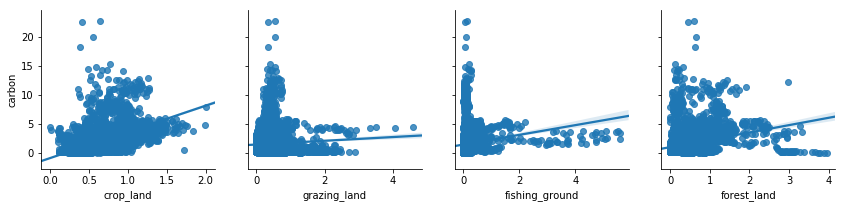

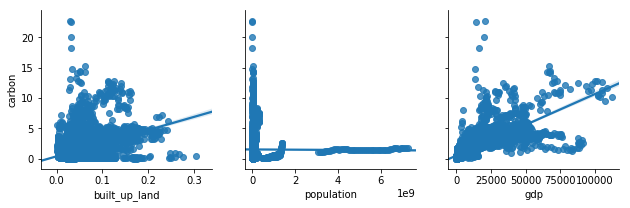

In [52]:
features=['crop_land','grazing_land','fishing_ground','forest_land','built_up_land','population','gdp']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
# sns.lmplot(x='crop_land', y='carbon',data=dfa,fit_reg=True)
for i in row_groups:
    sns.pairplot(data=df, y_vars=['carbon'],x_vars=i,kind='reg',height=3)




0

<bound method IndexOpsMixin.value_counts of 2          949.033
12         886.033
22         956.471
32        1043.540
42        1121.880
52        1172.140
62        1267.580
72        1317.740
82        1404.320
92        1548.080
102       1761.890
112       2019.980
122       2244.220
132       2571.990
142       2933.830
152       3366.160
162       3629.160
172       3136.810
182       3218.380
192       3371.670
202       3606.480
212       3710.580
222       3827.340
642        364.571
652        376.759
662        364.095
672        389.416
682        397.986
692        440.368
702        444.950
           ...    
86722    35457.200
86732    36057.500
86742    37973.200
86752    40677.900
86762    41842.200
86772    38667.900
86782    39452.100
86792    40001.900
86802    41557.300
86812    42432.600
86822    42637.300
86832    42277.600
86842    42720.800
86852    43986.100
86862    46659.500
86872    47869.500
86882    52413.100
86892    54131.900
86902    58288.800
86912 

In [21]:
dfa['carbon'].describe()
# dfa.hist(column=['carbon'], bins=30)

count    5.270000e+03
mean     1.391550e+08
std      8.366315e+08
min      1.002643e+05
25%      9.808234e+05
50%      5.510017e+06
75%      2.931417e+07
max      1.251963e+10
Name: carbon, dtype: float64

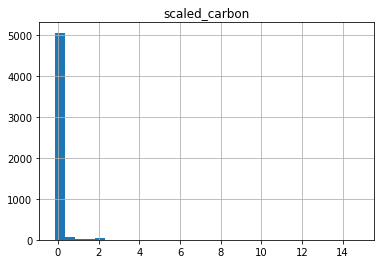

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfa['scaled_carbon']=scaler.fit_transform(dfa[['carbon']])
dfa.hist(column=['scaled_carbon'], bins=30)
dfa['scaled_carbon'].describe()
# dfa['carbon'].describe()
dfa['sqrt_carbon']=np.sqrt(dfa['carbon'])

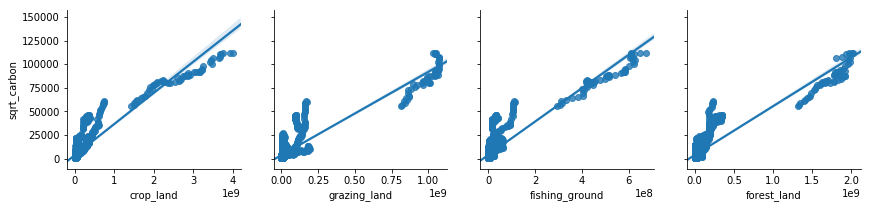

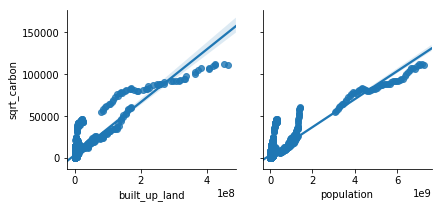

In [35]:
features=['crop_land','grazing_land','fishing_ground','forest_land','built_up_land','population']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
# sns.lmplot(x='crop_land', y='carbon',data=dfa,fit_reg=True)
for i in row_groups:
    sns.pairplot(data=df, y_vars=['sqrt_carbon'],x_vars=i,kind='reg',height=3)

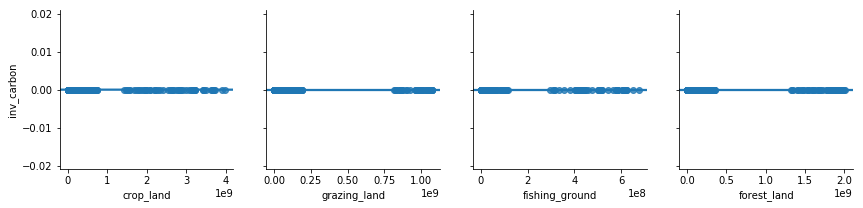

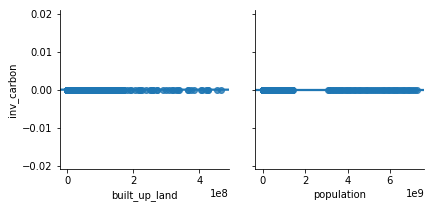

In [ ]:
# sns.pairplot(data=dfa)
sns.PairGrid(dfa).map(plt.scatter)

In [ ]:
model=smf.ols('carbon~population+crop_land+built_up_land',data=dfa).fit()
model.summary()

corr=dfa.corr()
def CorrMtx(df, dropDuplicates = True):

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)


In [ ]:
model = smf.ols(formula='carbon~crop_land+grazing_land+forest_land+fishing_ground+built_up_land', data=dfg).fit()
model = smf.ols(formula='carbon~grazing_land+built_up_land+crop_land', data=dfg).fit()
model.summary()
